# Student grades prediction Project

## Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades


### Columns Description-  total 43 columns

### -Seat No : 
The enrolled number of candidate that took the exams

### CGPA : 
The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
    
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
    
### Predict - 
CGPA of a student based on different grades in four years.


## Dataset Link-

•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv



In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [78]:
df=pd.read_csv('Students Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [79]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [80]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


# Exploratory Data Analysis EDA

In [81]:
df.shape

(571, 43)

In [82]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [83]:
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [84]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [85]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

We have have Null Values precented in our data set.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

<Axes: >

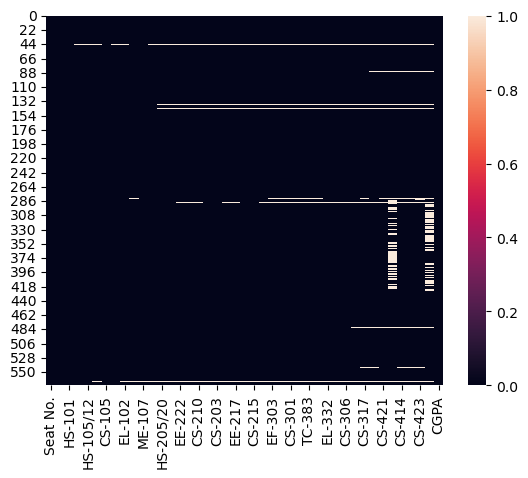

In [87]:
#We can also use heatmap to visualize if there is any null values presented

sns.heatmap(df.isnull())

There is missing data so we gonna drop the rows with the missing data with threshold 14 and we gonna use Simple Imputer for the columns with more than 14 missing values.

In [88]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy="most_frequent")


df['CS-406']=imp.fit_transform(df['CS-406'].values.reshape(-1,1))
df['CS-412']=imp.fit_transform(df['CS-412'].values.reshape(-1,1))

In [89]:
df.dropna(axis=0, inplace=True)

In [90]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Now we don't have missing values.

In [91]:
df.shape

(557, 43)

In [92]:
df.describe()

,CGPA
count,557.000000
mean,2.982995
std,0.588210
min,1.658000
25%,2.570000
50%,3.043000
75%,3.458000
max,3.985000


# Data Visualization and Statistical Summary

In [93]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [94]:
a=df.iloc[:,1:42]
a

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [95]:
for i in a.columns:
    print(a[i].value_counts())
    print("\n")

A-    112
A     110
B+     61
B      57
B-     54
D      40
C      32
C+     30
A+     22
D+     21
C-     18
Name: PH-121, dtype: int64


A-    81
B-    77
C     67
B     62
B+    58
C-    48
C+    45
D     42
A     38
D+    35
A+     4
Name: HS-101, dtype: int64


A     176
A-    120
B+     50
B      48
B-     42
A+     31
D      28
C      19
C+     16
C-     15
D+     12
Name: CY-105, dtype: int64


A     96
A-    73
B+    70
B     57
D     41
C     40
B-    39
C+    39
C-    35
A+    34
D+    33
Name: HS-105/12, dtype: int64


A-    103
A      99
B-     70
B+     62
B      54
C-     37
C+     33
C      30
D      25
A+     23
D+     21
Name: MT-111, dtype: int64


A     150
A-    133
B+     60
B      49
A+     43
B-     36
C+     23
C      21
C-     21
D+     14
D       7
Name: CS-105, dtype: int64


A-    115
B+     99
B      95
A      56
B-     53
C+     41
D+     29
C-     27
D      21
C      17
A+      4
Name: CS-106, dtype: int64


A-    104
A      92
B+     67
B      59
B-    

### Visualizing the count of grades for each year and department, where AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

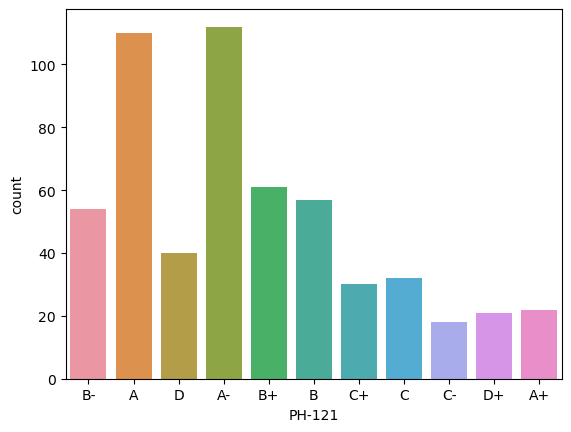

<Figure size 50000x1000 with 0 Axes>

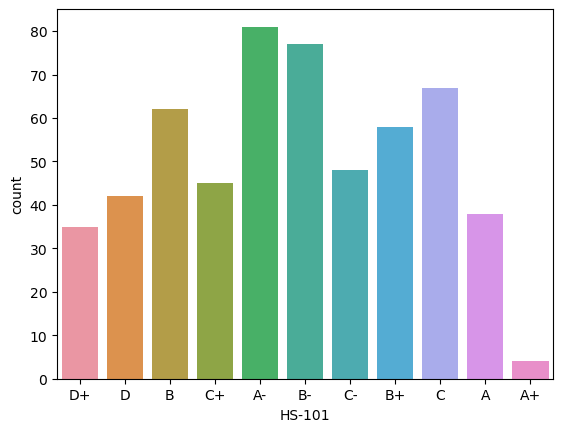

<Figure size 50000x1000 with 0 Axes>

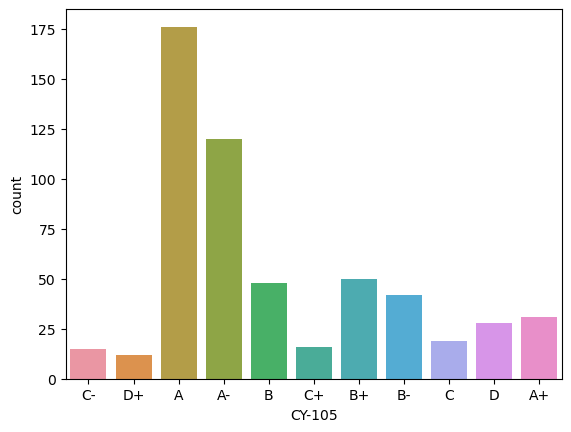

<Figure size 50000x1000 with 0 Axes>

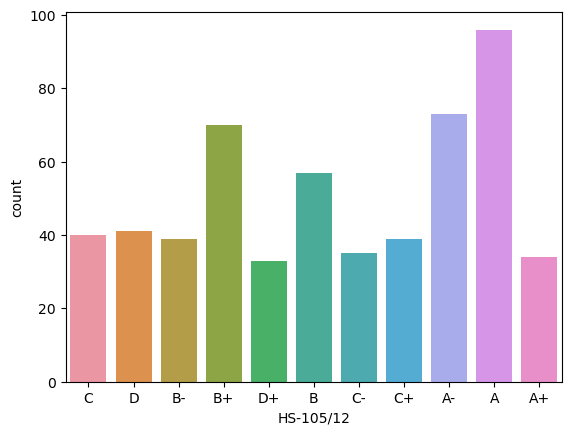

<Figure size 50000x1000 with 0 Axes>

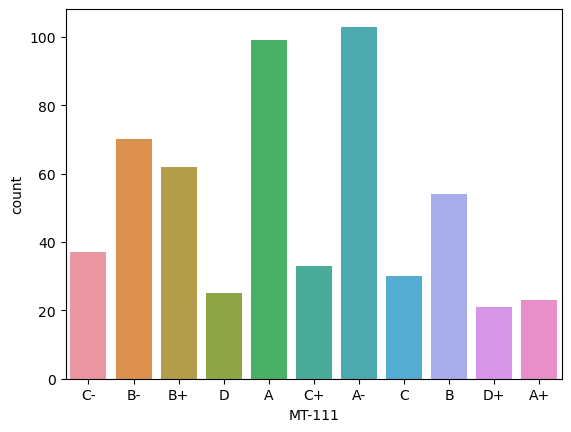

<Figure size 50000x1000 with 0 Axes>

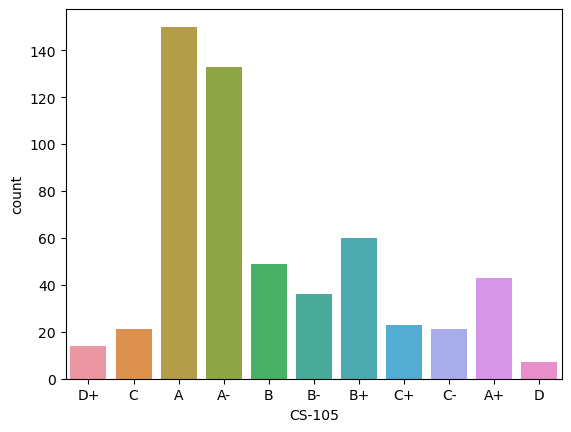

<Figure size 50000x1000 with 0 Axes>

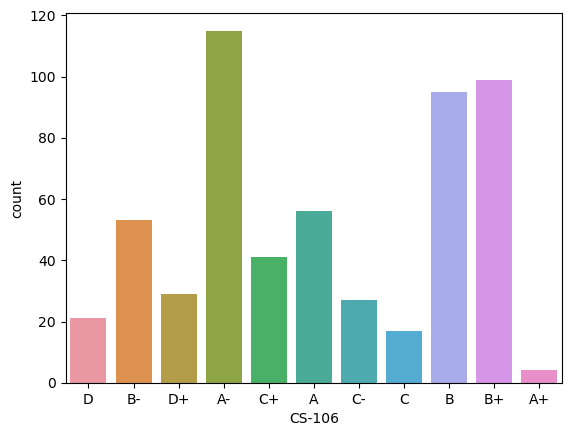

<Figure size 50000x1000 with 0 Axes>

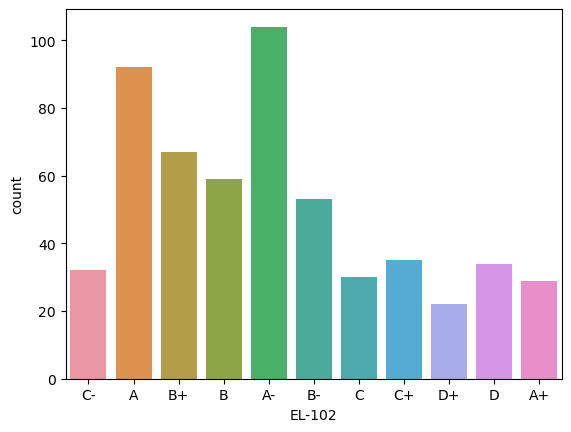

<Figure size 50000x1000 with 0 Axes>

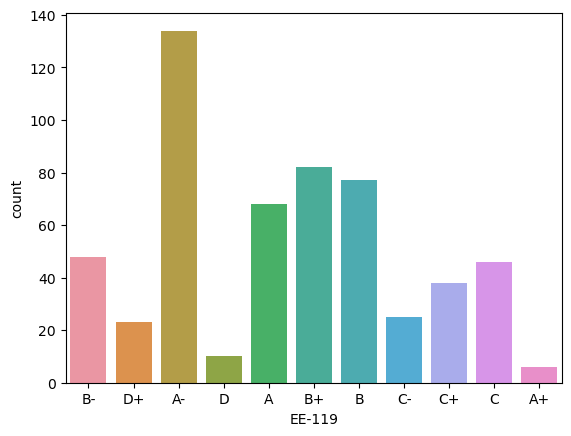

<Figure size 50000x1000 with 0 Axes>

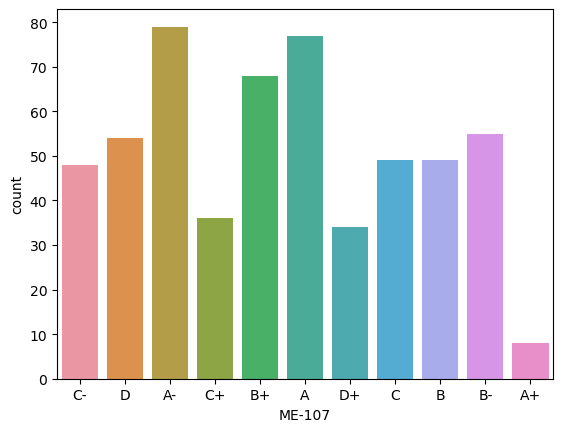

<Figure size 50000x1000 with 0 Axes>

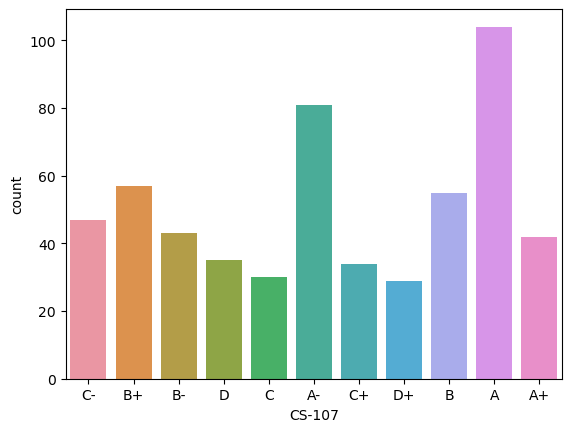

<Figure size 50000x1000 with 0 Axes>

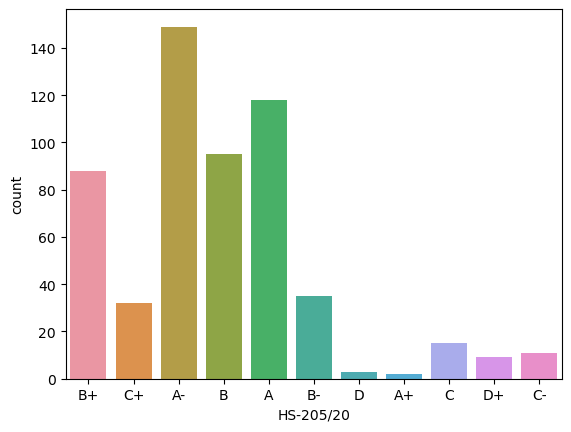

<Figure size 50000x1000 with 0 Axes>

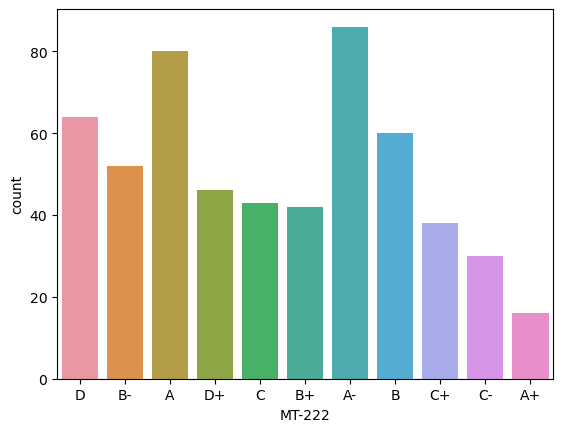

<Figure size 50000x1000 with 0 Axes>

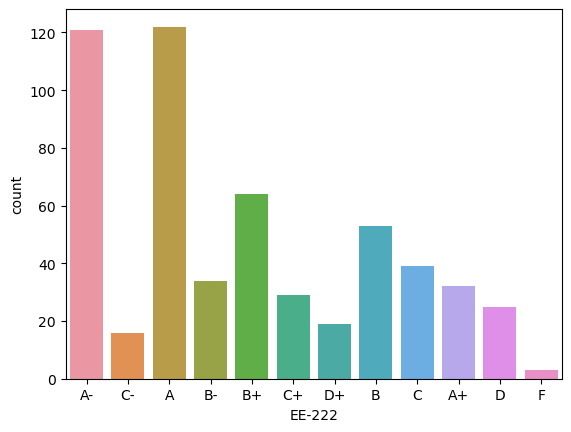

<Figure size 50000x1000 with 0 Axes>

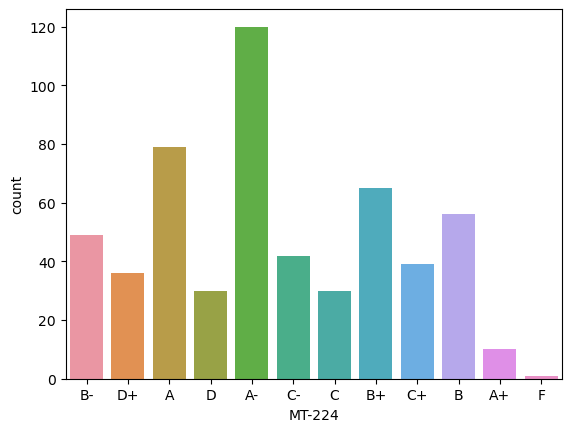

<Figure size 50000x1000 with 0 Axes>

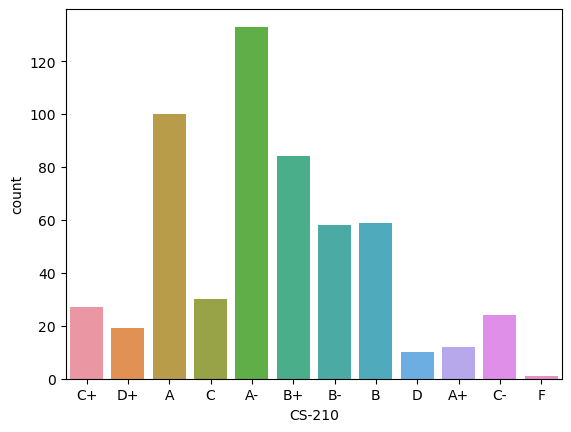

<Figure size 50000x1000 with 0 Axes>

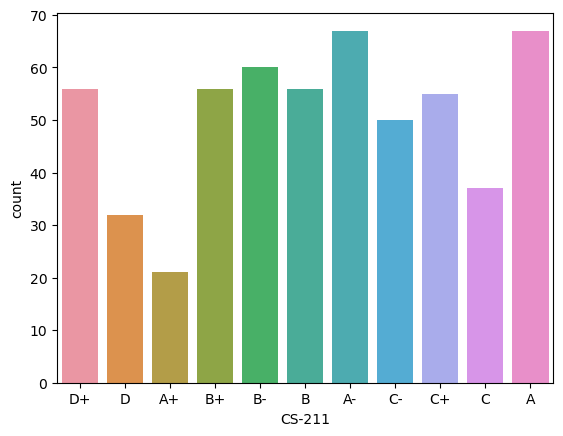

<Figure size 50000x1000 with 0 Axes>

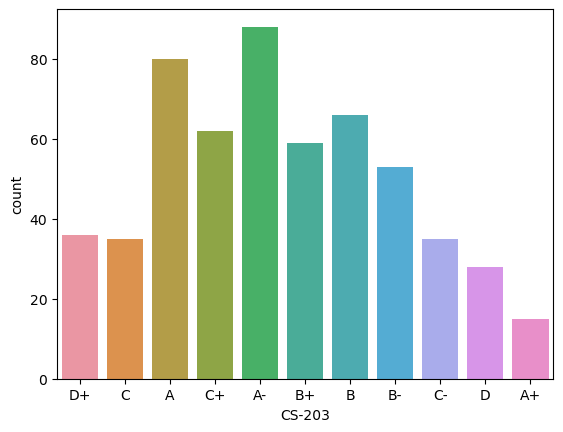

<Figure size 50000x1000 with 0 Axes>

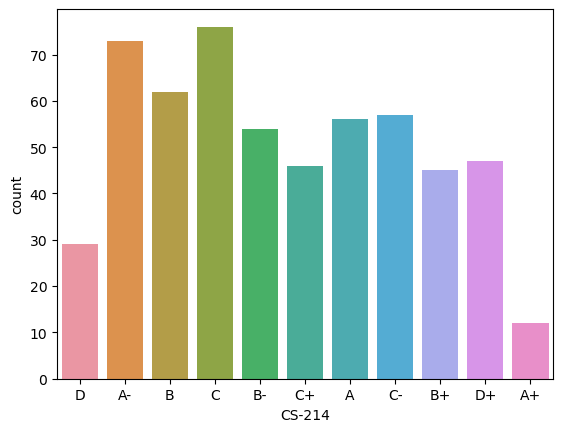

<Figure size 50000x1000 with 0 Axes>

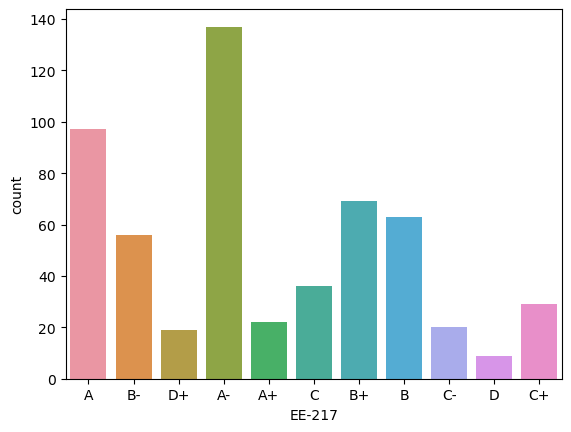

<Figure size 50000x1000 with 0 Axes>

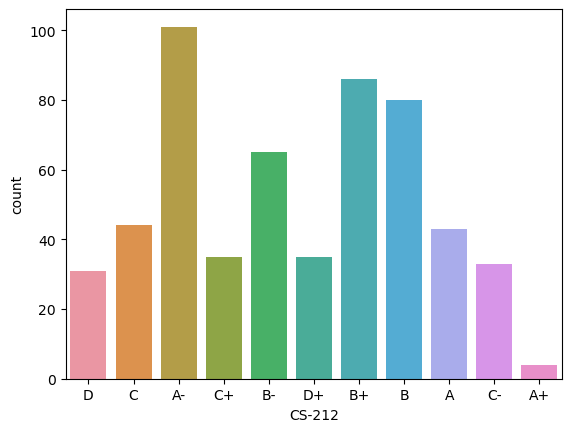

<Figure size 50000x1000 with 0 Axes>

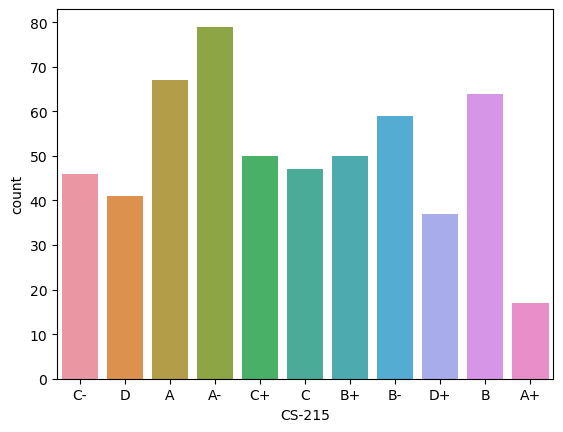

<Figure size 50000x1000 with 0 Axes>

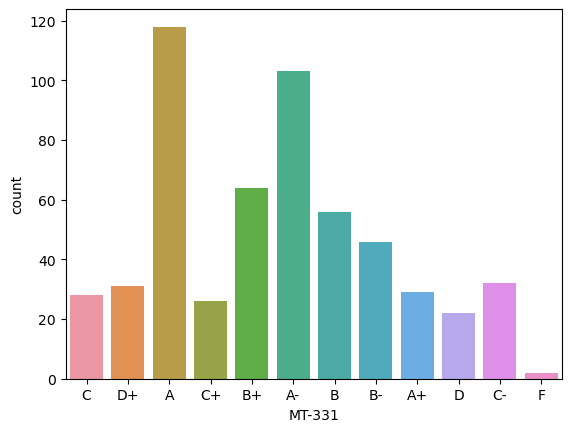

<Figure size 50000x1000 with 0 Axes>

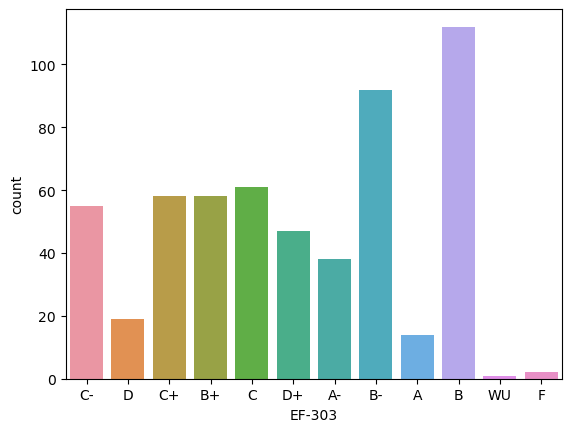

<Figure size 50000x1000 with 0 Axes>

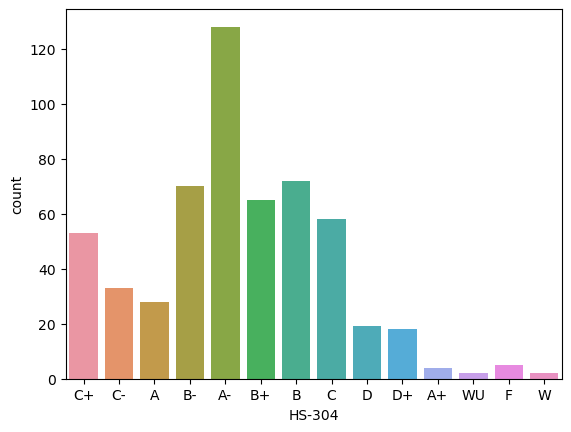

<Figure size 50000x1000 with 0 Axes>

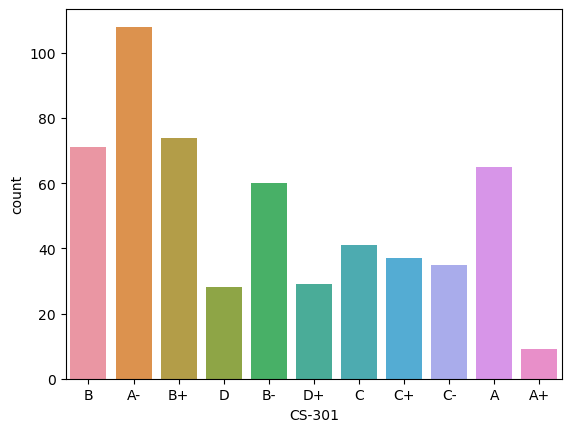

<Figure size 50000x1000 with 0 Axes>

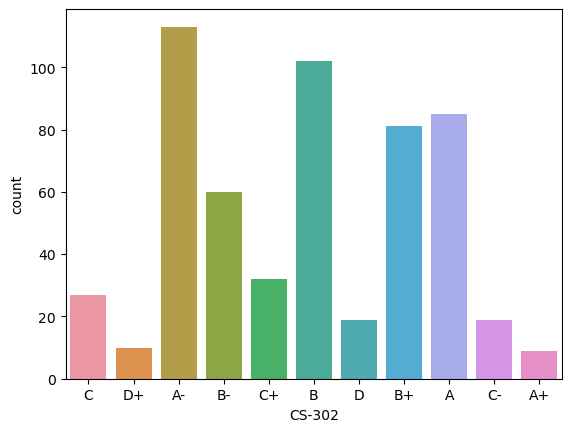

<Figure size 50000x1000 with 0 Axes>

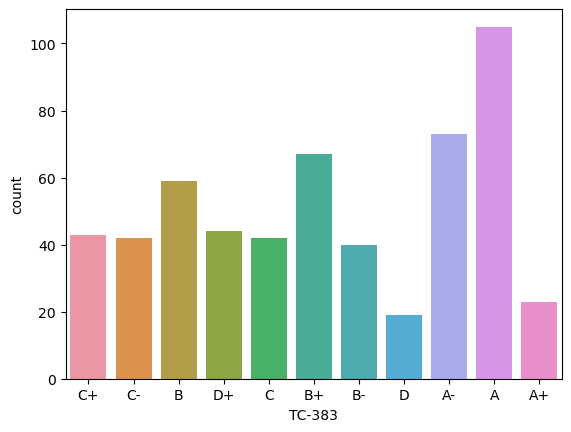

<Figure size 50000x1000 with 0 Axes>

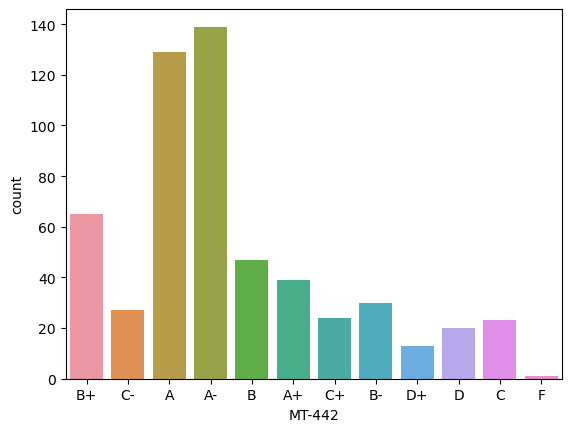

<Figure size 50000x1000 with 0 Axes>

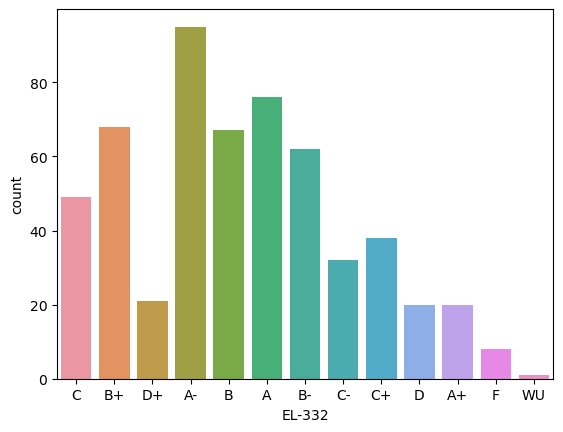

<Figure size 50000x1000 with 0 Axes>

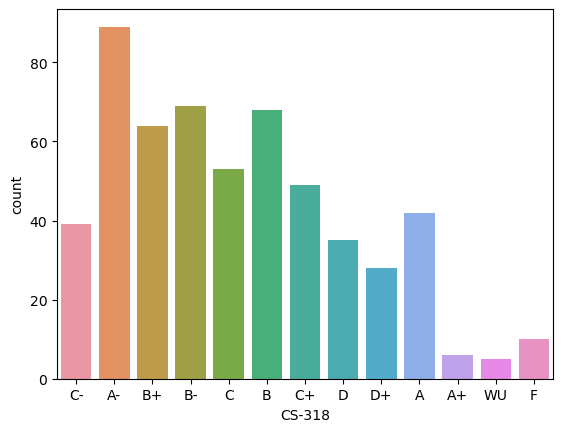

<Figure size 50000x1000 with 0 Axes>

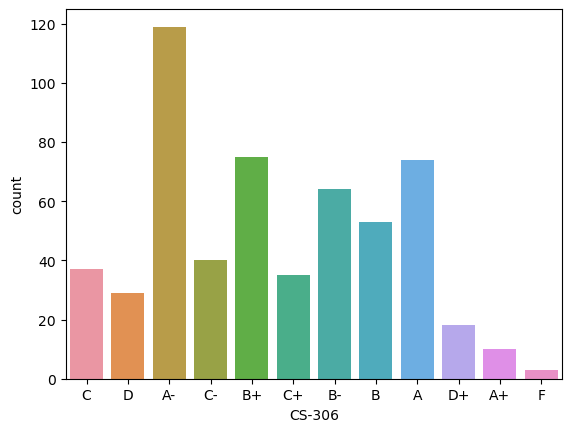

<Figure size 50000x1000 with 0 Axes>

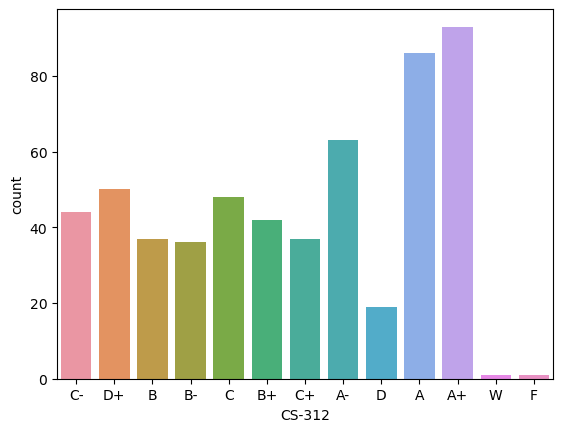

<Figure size 50000x1000 with 0 Axes>

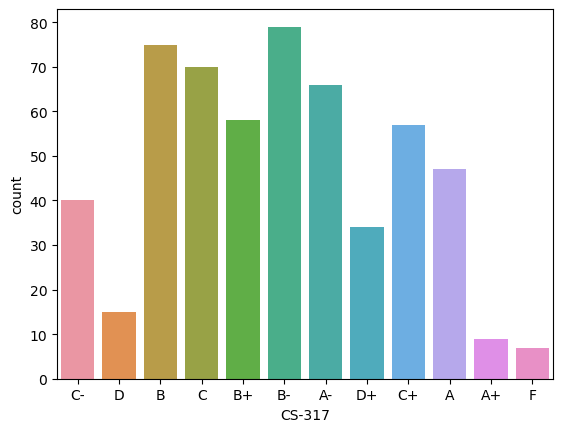

<Figure size 50000x1000 with 0 Axes>

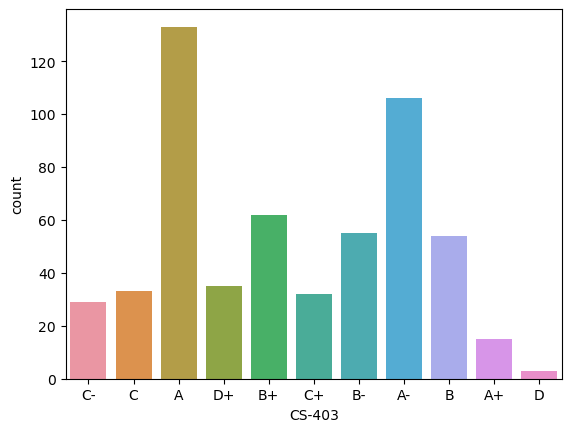

<Figure size 50000x1000 with 0 Axes>

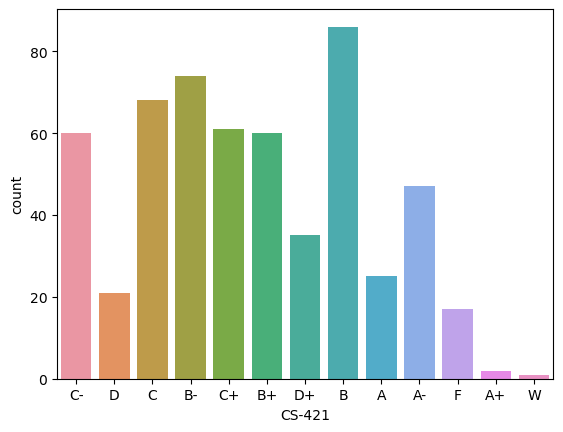

<Figure size 50000x1000 with 0 Axes>

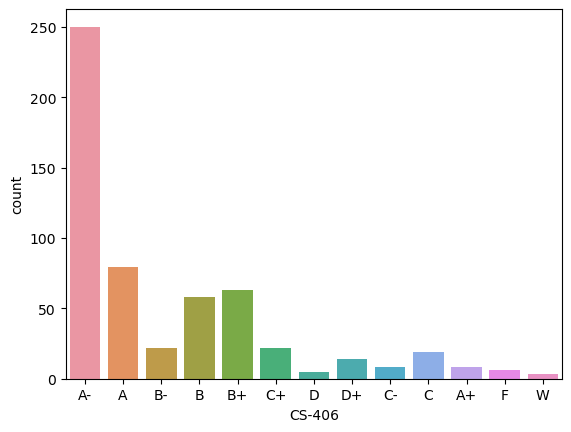

<Figure size 50000x1000 with 0 Axes>

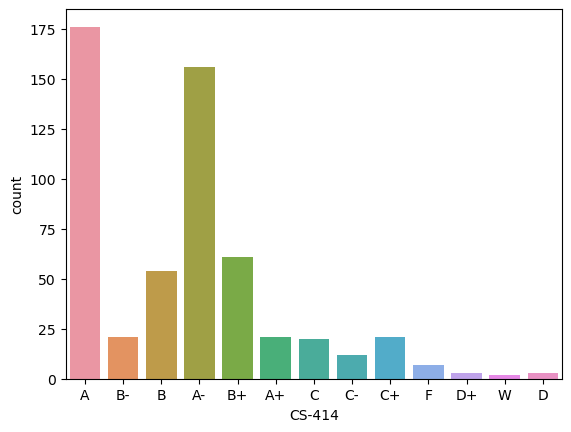

<Figure size 50000x1000 with 0 Axes>

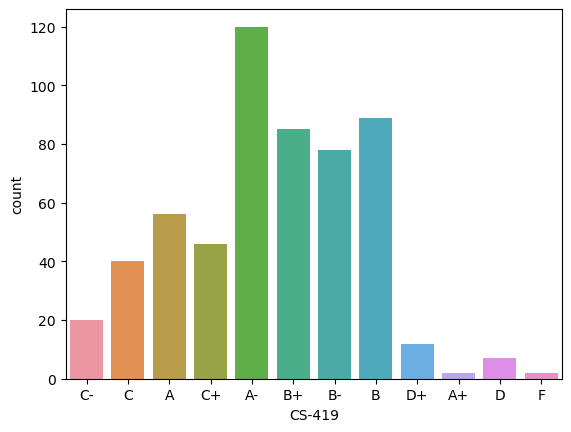

<Figure size 50000x1000 with 0 Axes>

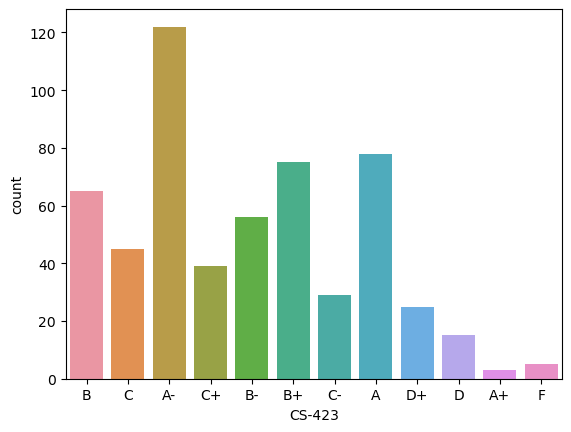

<Figure size 50000x1000 with 0 Axes>

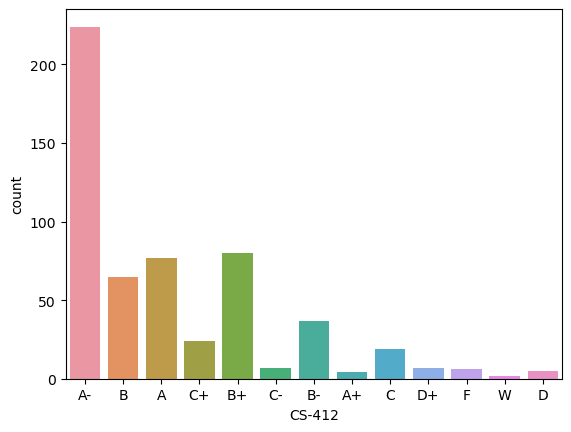

<Figure size 50000x1000 with 0 Axes>

In [96]:
for i in a.columns:
    ax=sns.countplot(x=i, data=a)
    plt.figure(figsize=(500,10))
    plt.show()

### Visualizing the count of grades for CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

3.019    5
2.793    3
3.772    3
2.206    3
2.756    3
        ..
2.253    1
3.844    1
3.882    1
2.555    1
1.753    1
Name: CGPA, Length: 479, dtype: int64


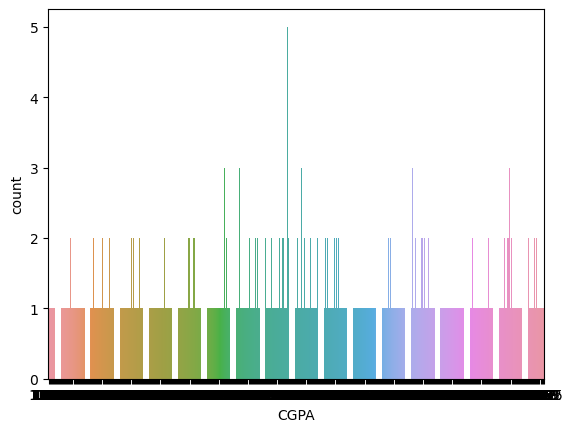

<Figure size 50000x1000 with 0 Axes>

In [97]:
print(df['CGPA'].value_counts())

ax=sns.countplot(x='CGPA', data=df)
plt.figure(figsize=(500,10))
plt.show()

## Cheking for skewness

In [98]:
df.skew()

CGPA   -0.336942
dtype: float64

Very low skewness presented.

## Checking for outliers

We gonna check for outliers only in CGPA column as it contains numerical data. We don't need to remove outliers for categorical data.

<Axes: >

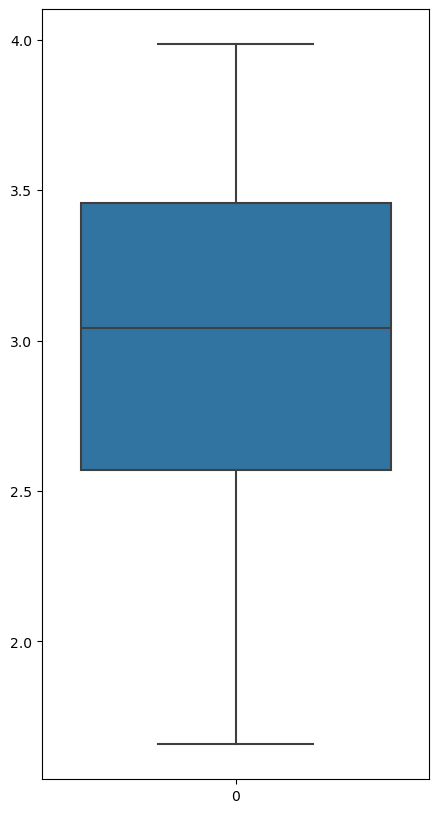

In [99]:
plt.figure(figsize=(5,10), facecolor='white')

sns.boxplot(df['CGPA'])

There is no outliers presented in CGPA column.

Our dataset has categorical and numerical data. In order to proceed with machine learning and EDA we need to convert the categorical data to numerical. For this purpose we gonna use LabelEncoder.

## Encoding categorical data

In [100]:
#Dropping Seat No. column as we don't need it for our prediction

df=df.drop(['Seat No.'], axis=1)

In [101]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
        
df.dtypes

PH-121         int32
HS-101         int32
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105         int32
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331         int32
EF-303         int32
HS-304         int32
CS-301         int32
CS-302         int32
TC-383         int32
MT-442         int32
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317         int32
CS-403         int32
CS-421         int32
CS-406         int32
CS-414         int32
CS-419         int32
CS-423         int32
CS-412         int32
CGPA         float64
dtype: object

In [102]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [103]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,...,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,3.675045,5.023339,2.770197,4.161580,3.825853,2.754039,4.064632,3.867145,3.833034,4.696589,...,4.077199,4.818671,3.488330,5.416517,2.985637,2.450628,3.888689,4.016158,3.043088,2.982995
std,2.968717,2.772779,2.817783,3.145014,2.907478,2.629831,2.674040,2.950481,2.611359,3.092031,...,3.326285,2.765631,2.959309,2.719292,2.458243,2.502478,2.381395,2.812758,2.306920,0.588210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.658000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.570000
50%,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.043000
75%,6.000000,7.000000,4.000000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,7.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.458000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,12.000000,11.000000,10.000000,12.000000,12.000000,12.000000,11.000000,11.000000,12.000000,3.985000


## Checking the correlation

In [104]:
cor=df.corr()
cor

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.358818,0.534805,0.486449,0.450601,0.585024,0.276565,0.401832,0.575775,0.521792,...,0.061011,0.472770,0.370218,0.336281,0.317528,0.189213,0.502921,0.124910,0.325593,-0.638173
HS-101,0.358818,1.000000,0.314448,0.468366,0.423943,0.377671,0.304225,0.338941,0.298862,0.325988,...,0.225623,0.364089,0.248046,0.325503,0.285553,0.245502,0.298653,0.246012,0.240247,-0.526328
CY-105,0.534805,0.314448,1.000000,0.475048,0.513206,0.562002,0.348804,0.416658,0.475322,0.454387,...,0.299330,0.491541,0.535880,0.416948,0.164662,0.048891,0.489360,0.162268,0.088128,-0.638569
HS-105/12,0.486449,0.468366,0.475048,1.000000,0.476717,0.474522,0.491281,0.340736,0.407119,0.306892,...,0.289018,0.489721,0.489311,0.455415,0.189899,0.169438,0.496862,0.261981,0.169343,-0.614230
MT-111,0.450601,0.423943,0.513206,0.476717,1.000000,0.372157,0.488872,0.537802,0.396030,0.457856,...,0.510028,0.568894,0.461208,0.559932,0.330811,0.260471,0.540620,0.437117,0.294744,-0.743386
CS-105,0.585024,0.377671,0.562002,0.474522,0.372157,1.000000,0.271322,0.338143,0.492923,0.436049,...,0.078660,0.393227,0.323522,0.278932,0.270707,0.156251,0.341107,0.070321,0.206603,-0.577874
CS-106,0.276565,0.304225,0.348804,0.491281,0.488872,0.271322,1.000000,0.313172,0.283069,0.286249,...,0.490398,0.425485,0.477163,0.436564,0.145155,0.135133,0.458967,0.368831,0.206845,-0.544085
EL-102,0.401832,0.338941,0.416658,0.340736,0.537802,0.338143,0.313172,1.000000,0.449279,0.457093,...,0.331469,0.476442,0.349796,0.408397,0.277220,0.279727,0.412318,0.408994,0.283844,-0.653453
EE-119,0.575775,0.298862,0.475322,0.407119,0.396030,0.492923,0.283069,0.449279,1.000000,0.554595,...,0.168792,0.450044,0.379693,0.386693,0.317347,0.238595,0.493017,0.268250,0.337371,-0.645088
ME-107,0.521792,0.325988,0.454387,0.306892,0.457856,0.436049,0.286249,0.457093,0.554595,1.000000,...,0.211254,0.468675,0.369633,0.377630,0.322889,0.182037,0.470733,0.248310,0.310713,-0.657450


In [105]:
cor['CGPA'].sort_values(ascending=False)

CGPA         1.000000
CS-414      -0.457436
HS-205/20   -0.464809
CS-312      -0.523029
HS-101      -0.526328
CS-412      -0.531185
CS-406      -0.541171
CS-106      -0.544085
EF-303      -0.544871
MT-331      -0.575837
CS-105      -0.577874
CS-423      -0.594302
EE-222      -0.609661
HS-105/12   -0.614230
HS-304      -0.621495
CS-107      -0.622695
MT-442      -0.628822
CS-318      -0.628852
CS-403      -0.634368
PH-121      -0.638173
CY-105      -0.638569
EE-119      -0.645088
CS-211      -0.649183
EL-102      -0.653453
ME-107      -0.657450
TC-383      -0.657648
CS-203      -0.659808
CS-212      -0.665462
MT-222      -0.675735
EE-217      -0.680026
CS-419      -0.723582
CS-301      -0.727831
CS-421      -0.729381
MT-224      -0.729898
MT-111      -0.743386
CS-302      -0.754552
CS-214      -0.754673
CS-215      -0.758812
CS-306      -0.770353
EL-332      -0.792640
CS-210      -0.792677
CS-317      -0.801810
Name: CGPA, dtype: float64

We can see the correlation between the dependent and independents values in ascending order.

## Checking Variance Inflation Factor VIF

In [106]:
x=df.drop('CGPA', axis=1)
y=df['CGPA']

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,7.019620,PH-121
1,7.305980,HS-101
2,4.790382,CY-105
3,6.271577,HS-105/12
4,7.072871,MT-111
5,4.898273,CS-105
6,6.349870,CS-106
7,5.333230,EL-102
8,6.898496,EE-119
9,7.512673,ME-107


# Machine Learning

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Creating train test split

In [109]:
x=df.drop('CGPA', axis=1)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


In [110]:
y=y=df['CGPA']
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 557, dtype: float64

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=10)

In [112]:
x_train.shape

(389, 41)

In [113]:
y_train.shape

(389,)

In [114]:
x_test.shape

(168, 41)

In [115]:
y_test.shape

(168,)

We have regression problem.

## Linear Regression

In [116]:
lr=LinearRegression()

In [117]:
lr.fit(x_train,y_train)

LinearRegression()

In [118]:
lr.score(x_train, y_train)

0.9923343169748214

99%

In [119]:
#Predicted Values
lrpred=lr.predict(x_test)
lrpred

array([2.75619479, 3.73987765, 3.09396447, 3.65616542, 2.94177347,
       3.21225177, 3.21421414, 1.89548284, 3.914747  , 3.54799165,
       3.5083155 , 2.73621904, 3.82812627, 2.68704249, 3.13888254,
       3.80960301, 3.05338769, 3.18765465, 2.2961537 , 2.55858153,
       3.11163557, 2.68288468, 2.82418032, 3.35656124, 2.79906819,
       2.99540116, 2.9896036 , 2.79187177, 4.03009653, 1.76488539,
       3.77720339, 3.45696693, 2.44140224, 2.59064848, 3.53379579,
       2.90616071, 3.55538734, 3.17697166, 2.63754141, 3.14892083,
       3.15349322, 3.72261211, 2.67641407, 1.92709057, 3.01161257,
       2.37475391, 3.37263929, 3.0300458 , 3.0838854 , 2.18712789,
       2.24334028, 2.65559332, 3.29720553, 2.99451401, 2.43005854,
       3.66480266, 4.04105264, 3.7250947 , 2.89067639, 2.54196077,
       3.86121396, 2.96714456, 3.44004988, 2.60786404, 2.68601166,
       3.30329186, 2.37275352, 1.99214275, 3.651771  , 2.57460801,
       3.86100723, 3.40963935, 2.71380838, 3.12974969, 3.29209

In [120]:
#Actial Values
y_test

269    2.845
174    3.723
414    3.103
370    3.618
153    2.936
       ...  
424    1.835
517    3.272
293    1.876
115    2.566
35     3.019
Name: CGPA, Length: 168, dtype: float64

In [121]:
print('R2_score: ', r2_score(y_test,lrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,lrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,lrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,lrpred)))

R2_score:  0.9879521402639552
Mean Absolute Error:  0.05009491351053397
Mean Squared Error:  0.003929489556408702
Root Mean Squared Error:  0.06268564075136109


## Decision Tree Regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [123]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [124]:
dtrpred=dtr.predict(x_test)
dtrpred

array([2.595, 3.662, 3.615, 3.585, 2.717, 3.443, 3.477, 2.208, 3.451,
       3.583, 3.583, 2.605, 3.908, 2.717, 3.585, 3.696, 2.88 , 3.179,
       1.992, 2.414, 3.167, 2.891, 2.49 , 3.246, 2.857, 3.167, 3.056,
       2.791, 3.97 , 2.253, 3.597, 3.485, 2.698, 2.619, 3.572, 3.373,
       3.448, 3.266, 2.687, 3.44 , 3.193, 3.908, 2.716, 2.264, 2.784,
       2.188, 3.418, 2.579, 3.574, 2.396, 1.989, 2.579, 3.373, 2.756,
       2.264, 3.418, 3.756, 3.759, 2.334, 2.408, 3.659, 3.295, 3.759,
       2.951, 2.784, 3.477, 2.378, 1.936, 3.358, 2.484, 3.831, 3.513,
       2.773, 3.477, 3.019, 3.137, 3.03 , 3.44 , 3.696, 3.443, 3.806,
       2.084, 2.352, 2.88 , 3.491, 3.759, 2.791, 2.311, 3.949, 3.756,
       3.597, 3.483, 2.96 , 2.779, 3.868, 2.621, 3.696, 3.443, 1.719,
       3.972, 3.29 , 3.528, 3.645, 2.04 , 3.97 , 2.947, 2.602, 2.941,
       2.696, 3.037, 3.332, 3.245, 2.779, 2.779, 3.246, 2.028, 2.254,
       2.605, 1.989, 3.476, 2.698, 3.055, 3.876, 3.625, 3.133, 2.414,
       3.737, 3.972,

In [125]:
#Actial Values
y_test

269    2.845
174    3.723
414    3.103
370    3.618
153    2.936
       ...  
424    1.835
517    3.272
293    1.876
115    2.566
35     3.019
Name: CGPA, Length: 168, dtype: float64

In [126]:
dtr.score(x_train, y_train)

1.0

In [127]:
print('R2_score: ', r2_score(y_test,dtrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,dtrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,dtrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,dtrpred)))

R2_score:  0.8214273571278764
Mean Absolute Error:  0.17898809523809525
Mean Squared Error:  0.058242654761904745
Root Mean Squared Error:  0.24133515028255778


## Support Vector Regressor

In [128]:
from sklearn.svm import SVR

svr=SVR()

In [129]:
svr.fit(x_train,y_train)

SVR()

In [130]:
svrpred=svr.predict(x_test)
svrpred

array([2.7471923 , 3.80695283, 3.02721301, 3.61340547, 2.88468102,
       3.20638267, 3.15166777, 1.89364613, 3.81871129, 3.38560193,
       3.5899514 , 2.72172042, 3.68629772, 2.6556923 , 3.11367675,
       3.59651088, 2.95905201, 3.18474902, 2.30768229, 2.50500388,
       3.09993871, 2.64412876, 2.80583985, 3.32838425, 2.74016487,
       2.95343938, 3.01295724, 2.77050444, 3.79196061, 2.05897002,
       3.6642865 , 3.47072008, 2.46516485, 2.55658789, 3.57471648,
       2.82701163, 3.60273798, 3.0777331 , 2.62086903, 3.17438487,
       3.28708682, 3.77528841, 2.65894103, 2.09109984, 3.0840446 ,
       2.35309082, 3.49538224, 3.08087173, 3.04400221, 2.27613275,
       2.1686755 , 2.64560712, 3.28151473, 3.00930237, 2.37582838,
       3.59887111, 3.82857984, 3.73682263, 2.82026927, 2.52852446,
       3.63675873, 2.94480737, 3.49219748, 2.59201466, 2.63586635,
       3.35420905, 2.4250956 , 2.12187391, 3.60345638, 2.58195597,
       3.77140286, 3.4754681 , 2.66366728, 3.08705033, 3.31178

In [131]:
svr.score(x_train, y_train)

0.9878571042438159

In [132]:
print('R2_score: ', r2_score(y_test,svrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,svrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,svrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,svrpred)))

R2_score:  0.9700334692956816
Mean Absolute Error:  0.07605177245710308
Mean Squared Error:  0.009773783229906444
Root Mean Squared Error:  0.09886244600406387


## Random Forest Regressor

In [133]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=200, random_state=42)

In [134]:
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [135]:
rfrpred= rfr.predict(x_test)
rfrpred

array([2.87267 , 3.66069 , 2.971405, 3.5312  , 2.84914 , 3.257385,
       3.281545, 2.096765, 3.620615, 3.45273 , 3.52028 , 2.47949 ,
       3.748125, 2.69069 , 3.405435, 3.734315, 2.89893 , 3.17205 ,
       2.230815, 2.64231 , 3.076775, 2.63139 , 2.85271 , 3.2948  ,
       2.921635, 2.967495, 2.99337 , 2.96576 , 3.895855, 2.11796 ,
       3.756395, 3.54354 , 2.54748 , 2.69208 , 3.523455, 3.081735,
       3.551405, 3.20114 , 2.662055, 3.300635, 3.181565, 3.65014 ,
       2.628745, 2.261255, 3.1339  , 2.207165, 3.47303 , 2.847285,
       3.292255, 2.21062 , 2.271445, 2.799895, 3.291475, 3.039335,
       2.487725, 3.697175, 3.830475, 3.72178 , 3.074595, 2.56138 ,
       3.719235, 3.149535, 3.40396 , 2.94436 , 2.806505, 3.26507 ,
       2.513225, 2.230555, 3.52128 , 2.628415, 3.75925 , 3.321765,
       2.73264 , 3.141095, 3.232995, 3.06769 , 3.110795, 3.43992 ,
       3.76052 , 3.405365, 3.744775, 2.49052 , 2.615505, 2.299115,
       3.395295, 3.73069 , 2.948605, 2.4439  , 3.672595, 3.614

In [136]:
rfr.score(x_train, y_train)

0.9942386159517322

In [137]:
print('R2_score: ', r2_score(y_test,rfrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,rfrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,rfrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,rfrpred)))

R2_score:  0.9519332890136015
Mean Absolute Error:  0.09304928571428543
Mean Squared Error:  0.015677277372916597
Root Mean Squared Error:  0.12520893487653587


## AdaBoost Regressor

In [138]:
from sklearn.ensemble import AdaBoostRegressor

abr=AdaBoostRegressor()

In [139]:
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [140]:
abrpred=abr.predict(x_test)
abrpred

array([2.903275  , 3.52097059, 3.05269231, 3.49457282, 2.91735514,
       3.0745875 , 3.12543548, 1.94354455, 3.5294    , 3.38962791,
       3.3970614 , 2.55011957, 3.63508475, 2.78054902, 3.32990385,
       3.59226667, 2.88947059, 3.11190909, 2.370125  , 2.62264063,
       3.08679592, 2.60519048, 3.0498913 , 3.20692857, 2.92701266,
       2.91735514, 2.94041304, 2.94932857, 3.75028   , 2.13555   ,
       3.56371875, 3.4285082 , 2.46370732, 2.75107143, 3.3970614 ,
       2.89307207, 3.43676316, 3.24516667, 2.57041333, 3.26245238,
       3.15988889, 3.51127679, 2.66883333, 2.19435897, 3.05257143,
       2.3181875 , 3.3618375 , 2.91735514, 3.12379545, 2.35484   ,
       2.33308108, 2.82558824, 3.20692857, 2.935575  , 2.46370732,
       3.56371875, 3.73887805, 3.5294    , 3.04824444, 2.42430435,
       3.5294    , 3.04057534, 3.27175862, 3.01910204, 2.76917391,
       3.20546667, 2.46408511, 2.31481633, 3.42371698, 2.55011957,
       3.58757778, 3.27175862, 2.85647887, 3.0745875 , 3.17378

In [141]:
abr.score(x_train, y_train)

0.9615918828978728

In [142]:
print('R2_score: ', r2_score(y_test,abrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,abrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,abrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,abrpred)))

R2_score:  0.9226805717298188
Mean Absolute Error:  0.13008169530729277
Mean Squared Error:  0.02521824560973116
Root Mean Squared Error:  0.15880253653431095


### Best accuracy we get with Decision Tree Regressor.

### Maximum r2_score we get with Linear Regression.

## Cross Validation Score

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
x=df.drop('CGPA', axis=1)
y=df['CGPA']

In [145]:
#CV score for Linear Regression

score=cross_val_score(lr,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())

Score:  [0.98723897 0.992055   0.98743844 0.98727668 0.98523545]
Mean Score:  0.9878489080645079
Std deviation:  0.0022534120549782136


In [146]:
#CV score for DTR

score=cross_val_score(dtr,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())

Score:  [0.82493077 0.81699966 0.78387208 0.76932498 0.80264175]
Mean Score:  0.7995538483557896
Std deviation:  0.020579513684452096


# Prediction of CGPA of a student based on different grades in four years.

In [147]:
data = {'PH-121':3, 'HS-101': 8, 'CY-105':7, 'HS-105/12':6, 'MT-111':4, 'CS-105':1, 'CS-106':6, 'EL-102':2, 'EE-119': 1, 'ME-107':7, 'CS-107':5, 'HS-205/20':4, 'MT-222':5, 'EE-222':6, 'MT-224':2, 'CS-210': 1, 'CS-211':7, 'CS-203':6, 'CS-214':4, 'EE-217':5, 'CS-212':10, 'CS-215':2, 'MT-331': 1, 'EF-303':7, 'HS-304':6, 'CS-301':4, 'CS-302':5, 'TC-383':6, 'MT-442':9, 'EL-332': 1, 'CS-318':7, 'CS-306':6, 'CS-312':4, 'CS-317':5, 'CS-403':6, 'CS-421':2, 'CS-406': 1, 'CS-414':9, 'CS-419':4, 'CS-423':5, 'CS-412':6}
index=[0]
new=pd.DataFrame(data,index)
new

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,3,8,7,6,4,1,6,2,1,7,...,6,4,5,6,2,1,9,4,5,6


In [148]:
new_student=lr.predict(new)
print("CGPA of new student is: ", new_student)

CGPA of new student is:  [2.80403687]


In [149]:
new_student=dtr.predict(new)
print("CGPA of new student is: ", new_student)

CGPA of new student is:  [2.941]


# Saving the model

In [151]:
import joblib

joblib.dump(dtr, 'dtrmodel.obj')

['dtrmodel.obj']